In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_y = np.load("./data/parameter.train")
raw_x = np.load("./data/prepared_data.train")

In [3]:
def plot_x(x, sample=0):
    fig, ((ax0, ax1), (ax2, _)) = plt.subplots(2,2, sharex=True)
    sample = x[sample]
    ax0.plot(sample[0,:])
    ax1.plot(sample[1,:])
    ax2.plot(sample[2,:])
    fig.suptitle(f"X, shape={x.shape}")
    fig.set_size_inches(8,4)

def plot_y(y):
    fig, (ax0, ax1) = plt.subplots(2,1)
    fig.set_size_inches(5,4)
    fig.suptitle(f"Y, shape={y.shape}")
    ax0.plot(y[:,0])
    ax1.plot(y[:,1])

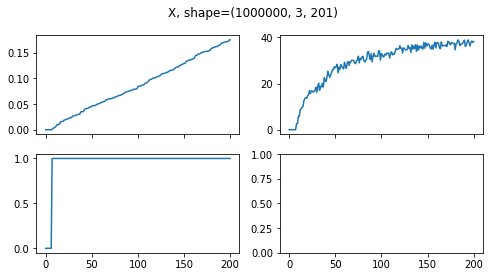

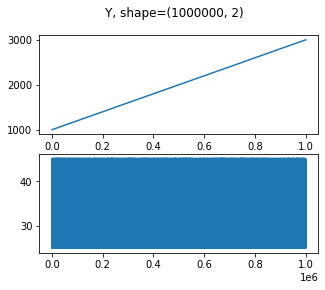

In [4]:
plot_x(raw_x)
plot_y(raw_y)

In [15]:
# split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(raw_x,
                                                    raw_y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    shuffle=True)
del raw_x
del raw_y

In [16]:
# normalize data
x_max = X_train.max(axis=(0,2))[:, np.newaxis]
x_min = X_train.min(axis=(0,2))[:, np.newaxis]

def norm(data, min, max): return np.divide(np.subtract(data, min), max - min)

X_train = norm(X_train, x_max, x_min)
X_test = norm(X_test, x_min, x_max)

y_max = Y_train.max(axis=0)
y_min = Y_train.min(axis=0)

Y_train = norm(Y_train, y_min, y_max)
Y_test = norm(Y_test, y_min, y_max)

np.savez("./data/stress_normalized", X_train=X_train, X_test = X_test, 
Y_train = Y_train, Y_test = Y_test, Y_max = y_max, Y_min = y_min, X_max = x_max, X_min = x_min)

: 

: 

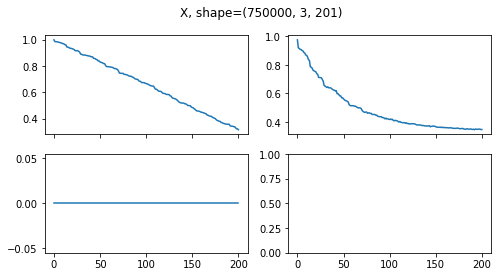

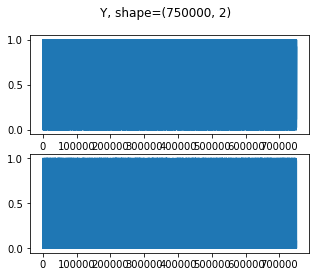

In [ ]:
plot_x(X_train)
plot_y(Y_train)

In [ ]:
Y_train.std(axis=0)

array([0.28870496, 0.28874844])